In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_city_df = pd.merge(city_data, ride_data, how='outer', on='city')
# Display the data table for preview
urban_df = combined_city_df[combined_city_df['type'] == 'Urban']
suburban_df = combined_city_df[combined_city_df['type'] == 'Suburban']
rural_df = combined_city_df[combined_city_df['type'] == 'Rural']
combined_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [14]:
# Obtain the x and y coordinates for each of the three city types

urban_group = urban_df.groupby(['city', 'type'])
urban_count = urban_group['driver_count'].mean()
urban_fare = urban_group['fare'].mean()
urban_rides = urban_group['ride_id'].count()

pyber_urban = pd.DataFrame({"Driver Count": urban_count,
                            "Average Fare": urban_fare,
                            "Total Rides": urban_rides})

suburban_group = suburban_df.groupby(['city', 'type'])
suburban_count = suburban_group['driver_count'].mean()
suburban_fare = suburban_group['fare'].mean()
suburban_rides = suburban_group['ride_id'].count()

pyber_suburban = pd.DataFrame({"Driver Count": suburban_count,
                               "Average Fare": suburban_fare,
                               "Total Rides": suburban_rides})

rural_group = rural_df.groupby(['city', 'type'])
rural_count = rural_group['driver_count'].mean()
rural_fare = rural_group['fare'].mean()
rural_rides = rural_group['ride_id'].count()

pyber_rural = pd.DataFrame({"Driver Count": rural_count,
                            "Average Fare": rural_fare,
                            "Total Rides": rural_rides})
pyber_rural.head()

,,Driver Count,Average Fare,Total Rides
city,type,,,
Bradshawfurt,Rural,7,40.064000,10
Garzaport,Rural,7,24.123333,3
Harringtonfort,Rural,4,33.470000,6
Jessicaport,Rural,1,36.013333,6
Lake Jamie,Rural,4,34.358333,6


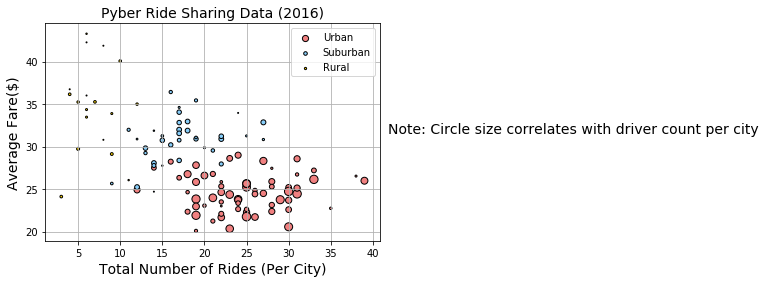

In [15]:
# Build the scatter plots for each city types

ax = pyber_urban.reset_index().plot(kind="scatter", x="Total Rides", y="Average Fare", color = 'lightcoral', grid=True, 
                                    edgecolors="black", label = 'Urban', s=urban_count)
pyber_suburban.reset_index().plot(kind="scatter", x="Total Rides", y="Average Fare", color = 'lightskyblue', grid=True, 
                                  ax=ax, edgecolors="black", s=suburban_count, label = 'Suburban')
pyber_rural.reset_index().plot(kind="scatter", x="Total Rides", y="Average Fare", color = 'gold', grid=True, 
                               ax=ax, edgecolors="black", s=rural_count, label = 'Rural')



# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)",fontsize=14)
plt.xlabel("Total Number of Rides (Per City)", fontsize=14)
plt.ylabel("Average Fare($)", fontsize=14)
# Create a legend
plt.legend(loc="best")
# Incorporate a text label regarding circle size
textstr = 'Note: Circle size correlates with driver count per city'
plt.text(.92, 0.5, textstr, fontsize=14, transform=plt.gcf().transFigure)
# Save Figure
plt.savefig("Pyber.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

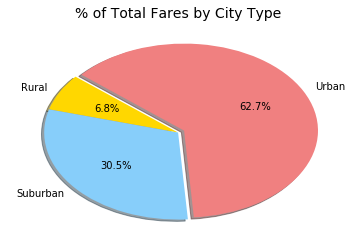

In [70]:
# Calculate Type Percents
citytype_fares = combined_city_df.groupby(['type'])
total_fares = citytype_fares['fare'].sum()
total_fares_df = pd.DataFrame({"": total_fares})
total_fares_df
# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.05)
total_fares_df.plot(kind="pie", y="", colors = colors, autopct="%1.1f%%", shadow=True, 
                    startangle=140, explode = explode, legend = None)

plt.title("% of Total Fares by City Type",fontsize=14)

# Save Figure
plt.savefig("Pyber_pie.png")

In [18]:
# Show Figure
plt.show()

## Total Rides by City Type

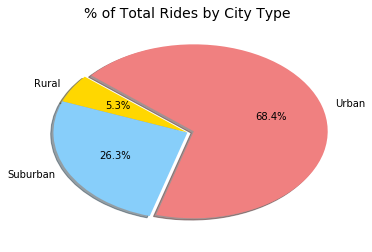

In [69]:
# Calculate Ride Percents
citytype_rides = combined_city_df.groupby(['type'])
total_rides = citytype_rides['ride_id'].count()
total_rides_df = pd.DataFrame({"": total_rides})
total_rides_df
# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.05)
total_rides_df.plot(kind="pie", y="", colors = colors, autopct="%1.1f%%", shadow=True, 
                    startangle=140, explode = explode, legend = None)
plt.title("% of Total Rides by City Type",fontsize=14)
# Save Figure
plt.savefig("Pyber_pie2.png")

In [27]:
# Show Figure
plt.show()

## Total Drivers by City Type

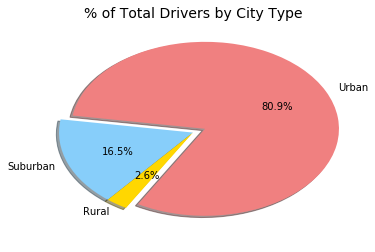

In [71]:
# Calculate Ride Percents
urban_drivers = urban_count.sum()
suburban_drivers = suburban_count.sum()
rural_drivers = rural_count.sum()

total_drivers = {'': [urban_drivers, suburban_drivers, rural_drivers]}
total_drivers_df = pd.DataFrame(total_drivers)
total_drivers_df.rename(index={0:'Urban',1:'Suburban', 2: 'Rural'}, inplace=True)
total_drivers_df


# Build Pie Chart

colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)
total_drivers_df.plot(kind="pie", y="", colors = colors, autopct="%1.1f%%", shadow=True, 
                    startangle=240, explode = explode, legend = None)
plt.title("% of Total Drivers by City Type",fontsize=14)

# Save Figure

plt.savefig("Pyber_pie3.png")

In [72]:
# Show Figure
plt.show()